In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Extraction et traitement des données

In [ ]:
df_litcovid = pd.read_json('/content/drive/MyDrive/3A/PSTALN/data/litcovid.json')

In [ ]:
#extraction des colonnes à utiliser
df_litcovid = df_litcovid[['title','abstract','topics']]

In [ ]:
df_litcovid.shape

(82107, 3)

Nombre de données n'ayant pas d'abstract ou n'ayant pas de topics : 31204

In [ ]:
#drop des lignes avec des valeurs manquantes
df_litcovid = df_litcovid.dropna()

In [ ]:
#drop des valeurs vides
df_litcovid = df_litcovid.loc[(np.array(list(map(len,df_litcovid.abstract.values)))>=1) &(np.array(list(map(len,df_litcovid.topics.values)))>=1)]
#réinitialisation des indexs
df_litcovid = df_litcovid.reset_index(drop=True)

In [ ]:
df_litcovid.shape

(41917, 3)

In [ ]:
# extraction des topics
liste_topics = df_litcovid.topics.to_list()
topics = []
for i in range(len(liste_topics)):
  for j in range(len(liste_topics[i])):
    topics.append(liste_topics[i][j])
topics = list(set(topics))

In [ ]:
# stockage des topics dans un dico
dico_topics={}
for i in range(len(topics)):
  dico_topics[topics[i]]= i


In [ ]:
list(dico_topics)

['Transmission',
 'Diagnosis',
 'Epidemic Forecasting',
 'Treatment',
 'Mechanism',
 'General Info',
 'NONE',
 'Case Report',
 'Prevention']

In [ ]:
#prend en entrée une liste de topics et retourne un vecteur de 0 et 1 
def topics_to_vector(liste):
  n = len(dico_topics)
  vector = [0 for i in range(n)]
  for element in liste:
    vector[dico_topics[element]] = 1
  return(vector)

In [ ]:
liste_temp = liste_topics
for i in  range(len(liste_temp)):
  liste_temp[i] = topics_to_vector(liste_temp[i])

In [ ]:
# #copy de la colonne topics
# column_temp = df_litcovid.topics.copy()
# nombre_lignes = column_temp.shape[0]
# #Transformation de la colonne
# for i in range(nombre_lignes):
#   column_temp.at[i] = topics_to_vector(column_temp[i])
# #rajout de la colonne
# df_litcovid['topics_vector'] = column_temp

In [ ]:
df_litcovid.head()

,title,abstract,topics
0,Hyperinflammation and Immune Response Generati...,Severe acute respiratory syndrome coronavirus-...,"[Mechanism, Treatment]"
1,COVID-19 pandemic and the skin: what should de...,The world has changed dramatically since the C...,[Prevention]
2,Coronavirus vaccine development: from SARS and...,Severe Acute Respiratory Syndrome Coronavirus ...,[Treatment]
3,Recommendations on intervention for hepatobili...,The SARS-CoV-2 (COVID-19) pandemic requires an...,[Prevention]
4,Management strategies for dermatomyositis duri...,"In late 2019, the coronavirus disease 2019 (CO...",[Prevention]


In [ ]:
topics_vectors = pd.DataFrame(liste_temp,columns=list(dico_topics.keys()))

In [ ]:
topics_vectors.head()

,Diagnosis,Treatment,Prevention,General Info,Case Report,Transmission,Mechanism,NONE,Epidemic Forecasting
0,0,1,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0


In [ ]:
# sns.set_theme(style="whitegrid")
# fig_size = plt.rcParams["figure.figsize"]
# fig_size[0] = 10
# fig_size[1] = 8
# plt.rcParams["figure.figsize"] = fig_size

# topics_vectors.sum(axis=0).plot.bar()
# plt.show()

In [ ]:
for element in topics_vectors.columns.to_list():
  df_litcovid[element] = topics_vectors[element]


In [ ]:
df_litcovid.head()

,title,abstract,topics,Diagnosis,Treatment,Prevention,General Info,Case Report,Transmission,Mechanism,NONE,Epidemic Forecasting
0,Hyperinflammation and Immune Response Generati...,Severe acute respiratory syndrome coronavirus-...,"[Mechanism, Treatment]",0,1,0,0,0,0,1,0,0
1,COVID-19 pandemic and the skin: what should de...,The world has changed dramatically since the C...,[Prevention],0,0,1,0,0,0,0,0,0
2,Coronavirus vaccine development: from SARS and...,Severe Acute Respiratory Syndrome Coronavirus ...,[Treatment],0,1,0,0,0,0,0,0,0
3,Recommendations on intervention for hepatobili...,The SARS-CoV-2 (COVID-19) pandemic requires an...,[Prevention],0,0,1,0,0,0,0,0,0
4,Management strategies for dermatomyositis duri...,"In late 2019, the coronavirus disease 2019 (CO...",[Prevention],0,0,1,0,0,0,0,0,0


#Visualisation

In [ ]:
counts = []
for element in list(dico_topics.keys()):
  counts.append((element,topics_vectors[element].sum()))
df_litcovid_stats = pd.DataFrame(counts,columns=['Topic','N° of articles'])

In [ ]:
df_litcovid_stats = df_litcovid_stats.sort_values('N° of articles',ascending=False)

In [ ]:
df_litcovid_stats.head()

,Topic,N° of articles
2,Prevention,18197
1,Treatment,15003
0,Diagnosis,10835
6,Mechanism,7594
4,Case Report,3294


In [ ]:
df_litcovid_stats.to_excel('stats.xlsx')

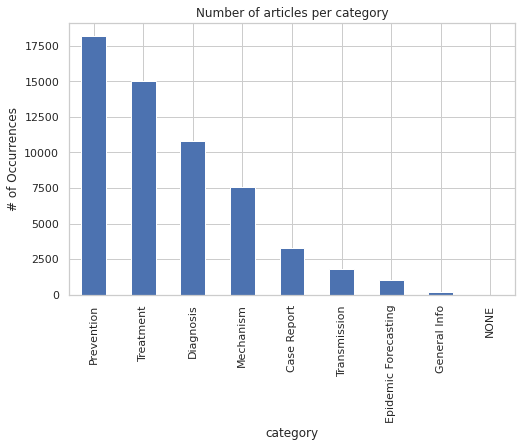

In [ ]:
# 
sns.set_theme(style="whitegrid")
df_litcovid_stats.plot(x='Topic', y='N° of articles', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of articles per category")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)
plt.show()

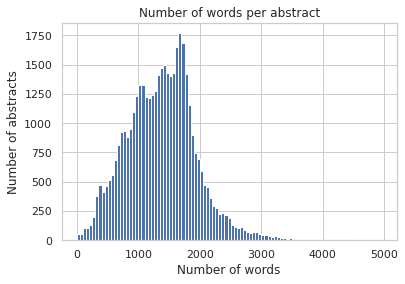

In [ ]:
# Histogramme pour visualiser le nombre de mots dans les abstracts
longueurs = df_litcovid.abstract.str.len()
longueurs.hist(bins = np.arange(0,5000,50))
plt.title("Number of words per abstract")
plt.ylabel('Number of abstracts', fontsize=12)
plt.xlabel('Number of words', fontsize=12)
plt.show()

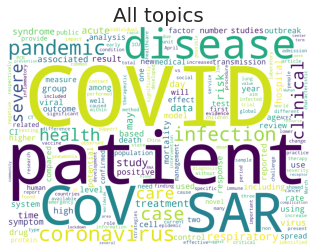

In [ ]:
#Tous les topics

text_all = df_litcovid.abstract.values
cloud_all = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text_all))
plt.axis('off')
plt.title("All topics",fontsize=20)
plt.imshow(cloud_all)
plt.show()


In [ ]:
#Prend en entrée un topic et retourne un cloud : image contenant les mots les plus fréquents dans les abstracts du topic
def cloud_topic(topic):
  text = df_litcovid[df_litcovid[topic]==1].abstract.values
  cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
  plt.axis('off')
  plt.title(topic,fontsize=20)
  plt.imshow(cloud)


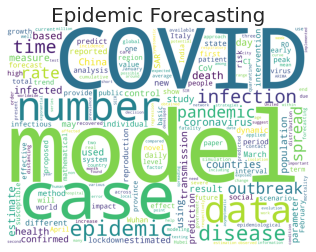

In [ ]:
cloud_topic('Epidemic Forecasting')

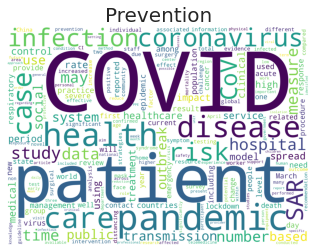

In [ ]:
cloud_topic('Prevention')

#Classification selon les topics

In [ ]:
# from numpy import array
# from keras.preprocessing.text import one_hot
# from keras.preprocessing.sequence import pad_sequences
# from keras.models import Sequential
# from keras.layers.core import Activation, Dropout, Dense
# from keras.layers import Flatten, LSTM
# from keras.layers import GlobalMaxPooling1D
# from keras.models import Model
# from keras.layers.embeddings import Embedding
# from sklearn.model_selection import train_test_split
# from keras.preprocessing.text import Tokenizer
# from keras.layers import Input
# from keras.layers.merge import Concatenate

# import pandas as pd
# import numpy as np
# import re



In [ ]:
# Tout en lower case
df_litcovid.abstract = df_litcovid.abstract.str.lower()

In [ ]:
X = df_litcovid.abstract.to_numpy()
y = topics_vectors.to_numpy()

In [ ]:
# limit = 10000
# X = X[:limit]
# y = y[:limit]

In [ ]:
y[:,dico_topics['Prevention']].shape

(41917,)

In [ ]:
dico_topics['Prevention']

2

In [ ]:
y.shape

(41917, 9)

In [ ]:
X.shape[0]

41917

In [ ]:
X[0]

'severe acute respiratory syndrome coronavirus-2 (sars-cov-2) that causes coronavirus disease 2019 (covid-19) pandemic has affected millions of people worldwide. the pathophysiology of this virus is not very clearly known, thus, enormous efforts are being made by the scientific community to delineate its evading mechanism. in this review, we have summarized the hyperinflammation and humoral and cell-mediated immune response generated in human body after infection with the sars-cov-2 virus. the inflammatory response generated after infection by increased proinflammatory cytokines and chemokines, and complement proteins activation may likely contribute to disease severity. we also discussed the other factors that may affect immunity and could be important comorbidities in the disease severity and outcome.'

##Preprocessing des données NTLK

In [ ]:
import nltk
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# Cette fonction prend en entrée un texte et retourne le même texte sans ponctuation
import regex as re
import string
def remove_punctuation(text):
    chaine = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    chaine_sans_ponctuation = chaine.sub(" ", text)
    return chaine_sans_ponctuation

In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.update(['covid','cov','coronavirus'])

In [ ]:
X[0]

'severe acute respiratory syndrome coronavirus-2 (sars-cov-2) that causes coronavirus disease 2019 (covid-19) pandemic has affected millions of people worldwide. the pathophysiology of this virus is not very clearly known, thus, enormous efforts are being made by the scientific community to delineate its evading mechanism. in this review, we have summarized the hyperinflammation and humoral and cell-mediated immune response generated in human body after infection with the sars-cov-2 virus. the inflammatory response generated after infection by increased proinflammatory cytokines and chemokines, and complement proteins activation may likely contribute to disease severity. we also discussed the other factors that may affect immunity and could be important comorbidities in the disease severity and outcome.'

In [ ]:
X[0] =remove_punctuation(X[0])
X[0]

'severe acute respiratory syndrome coronavirus    sars cov    that causes coronavirus disease       covid     pandemic has affected millions of people worldwide  the pathophysiology of this virus is not very clearly known  thus  enormous efforts are being made by the scientific community to delineate its evading mechanism  in this review  we have summarized the hyperinflammation and humoral and cell mediated immune response generated in human body after infection with the sars cov   virus  the inflammatory response generated after infection by increased proinflammatory cytokines and chemokines  and complement proteins activation may likely contribute to disease severity  we also discussed the other factors that may affect immunity and could be important comorbidities in the disease severity and outcome '

In [ ]:
def remove_stop_words(text):
  liste = word_tokenize(text)
  liste = [word for word in liste if not word in stop_words]
  string = ' '.join(word for word in liste)
  return (string)


In [ ]:
X[0] = remove_stop_words(X[0])
X[0]

'severe acute respiratory syndrome sars causes disease pandemic affected millions people worldwide pathophysiology virus clearly known thus enormous efforts made scientific community delineate evading mechanism review summarized hyperinflammation humoral cell mediated immune response generated human body infection sars virus inflammatory response generated infection increased proinflammatory cytokines chemokines complement proteins activation may likely contribute disease severity also discussed factors may affect immunity could important comorbidities disease severity outcome'

In [ ]:
X[0]

'severe acute respiratory syndrome sars causes disease pandemic affected millions people worldwide pathophysiology virus clearly known thus enormous efforts made scientific community delineate evading mechanism review summarized hyperinflammation humoral cell mediated immune response generated human body infection sars virus inflammatory response generated infection increased proinflammatory cytokines chemokines complement proteins activation may likely contribute disease severity also discussed factors may affect immunity could important comorbidities disease severity outcome'

In [ ]:
# On utilise le stemming pour traiter de la même manière les mots de la même racine

stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

In [ ]:
# On applique les transformations
for i in range(X.shape[0]):
  print(i)
  X[i] = remove_punctuation(X[i])
  X[i] = remove_stop_words(X[i])
  X[i] = stemming(X[i])

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
36917
36918
36919
36920
36921
36922
36923
36924
36925
36926
36927
36928
36929
36930
36931
36932
36933
36934
36935
36936
36937
36938
36939
36940
36941
36942
36943
36944
36945
36946
36947
36948
36949
36950
36951
36952
36953
36954
36955
36956
36957
36958
36959
36960
36961
36962
36963
36964
36965
36966
36967
36968
36969
36970
36971
36972
36973
36974
36975
36976
36977
36978
36979
36980
36981
36982
36983
36984
36985
36986
36987
36988
36989
36990
36991
36992
36993
36994
36995
36996
36997
36998
36999
37000
37001
37002
37003
37004
37005
37006
37007
37008
37009
37010
37011
37012
37013
37014
37015
37016
37017
37018
37019
37020
37021
37022
37023
37024
37025
37026
37027
37028
37029
37030
37031
37032
37033
37034
37035
37036
37037
37038
37039
37040
37041
37042
37043
37044
37045
37046
37047
37048
37049
37050
37051
37052
37053
37054
37055
37056
37057
37058
37059
37060
37061
37062
37063
37064
37065
37066
37067
37068
37069
3707

In [ ]:
X[0]

'sever acut respiratori syndrom sar caus diseas pandem affect million peopl worldwid pathophysiolog virus clear known thus enorm effort made scientif communiti delin evad mechan review summar hyperinflamm humor cell mediat immun respons generat human bodi infect sar virus inflammatori respons generat infect increas proinflammatori cytokin chemokin complement protein activ may like contribut diseas sever also discuss factor may affect immun could import comorbid diseas sever outcom'

In [ ]:
#Split des données
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [ ]:
#Vectorisation des données en utilisant la méthide TF-IDF
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(X_train)
vectorizer.fit(X_test)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

## OneVsRest with LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
import time 
accuracy = []
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])
t1 = time.time()
for topic in topics:
    print('Processing {} abstracts...'.format(topic))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(X_train, y_train[:,dico_topics[topic]])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy : {}'.format(accuracy_score(y_test[:,dico_topics[topic]], prediction)))
    accuracy.append(accuracy_score(y_test[:,dico_topics[topic]], prediction))
    print("\n")
t2 = time.time()
print('Total accuracy : ', np.prod(accuracy))
print('Temps : ', round(t2-t1,3), 'secondes')

Processing Diagnosis abstracts...
Test accuracy : 0.8828721374045801


Processing Treatment abstracts...
Test accuracy : 0.8920562977099237


Processing Prevention abstracts...
Test accuracy : 0.9297471374045801


Processing General Info abstracts...
Test accuracy : 0.9948711832061069


Processing Case Report abstracts...
Test accuracy : 0.9401240458015268


Processing Transmission abstracts...
Test accuracy : 0.9611164122137404


Processing Mechanism abstracts...
Test accuracy : 0.9204437022900763


Processing NONE abstracts...
Test accuracy : 1.0


Processing Epidemic Forecasting abstracts...
Test accuracy : 0.9780534351145038


Total accuracy :  0.5925742067239871
Temps :  69.598 secondes
